# Brightness

In [1]:
import sys
import numpy as np
import cv2

In [2]:
# 그레이스케일 영상 불러오기
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)
#src = cv2.imread('lenna.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

In [3]:
# 영상에 더하기
dst = cv2.add(src, 100) # GRAY SCALE
#dst = cv2.add(src, (100,100,100,0))
#dst =src +100
#dst = np.clip(src + 100., 0, 255).astype(np.uint8) (수정시)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

-1

In [4]:
# 컬러 영상 불러오기
src = cv2.imread('lenna.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

In [5]:
# 영상에 더하기
dst = cv2.add(src, (100, 100, 100, 0)) 
#dst = np.clip(src + 100., 0, 255).astype(np.uint8)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

# 산술연산

In [6]:
import sys
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [7]:
src1 = cv2.imread('lenna256.bmp', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('square.bmp', cv2.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:
    print('Image load failed!')
    sys.exit()

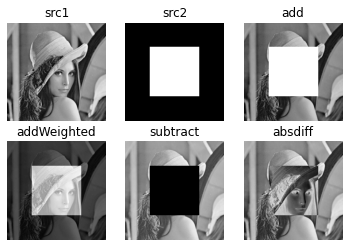

In [8]:
# 덧셈 연산
dst1 = cv2.add(src1, src2, dtype=cv2.CV_8U)

# 가중치 합
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.0)

# 뺄셈 연산
dst3 = cv2.subtract(src1, src2)

# 차이 연산
dst4 = cv2.absdiff(src1, src2)

plt.subplot(231), plt.axis('off'), plt.imshow(src1, 'gray'), plt.title('src1')
plt.subplot(232), plt.axis('off'), plt.imshow(src2, 'gray'), plt.title('src2')
plt.subplot(233), plt.axis('off'), plt.imshow(dst1, 'gray'), plt.title('add')
plt.subplot(234), plt.axis('off'), plt.imshow(dst2, 'gray'), plt.title('addWeighted')
plt.subplot(235), plt.axis('off'), plt.imshow(dst3, 'gray'), plt.title('subtract')
plt.subplot(236), plt.axis('off'), plt.imshow(dst4, 'gray'), plt.title('absdiff')
plt.show()

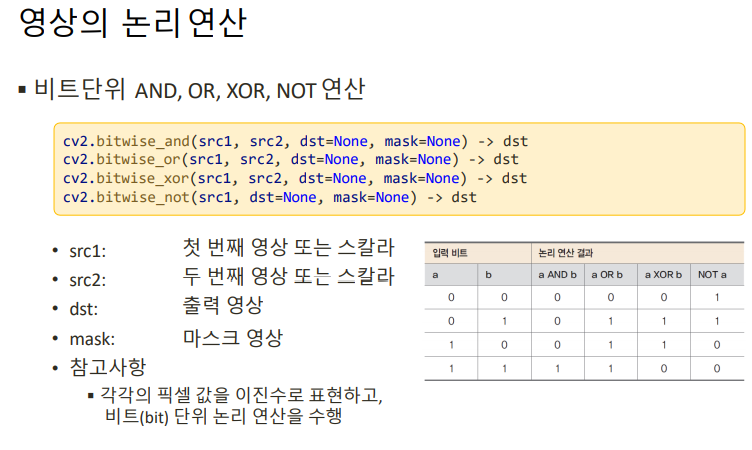

# 컬러영상

In [9]:
import sys
import numpy as np
import cv2

In [10]:
# 컬러 영상 불러오기
src = cv2.imread('candies.png', cv2.IMREAD_COLOR)

if src is None:
    print('Image load failed!')
    sys.exit()

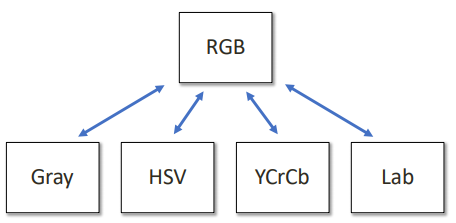

채널 분리
```cv2.split(m, mv=None)```

채널 결합 ```cv2.merge(mv, dst=None)```

## BGR

In [11]:
# 컬러 영상 속성 확인
print('src.shape:', src.shape)  # src.shape: (480, 640, 3)
print('src.dtype:', src.dtype)  # src.dtype: uint8

# RGB 색 평면 분할
b_plane, g_plane, r_plane = cv2.split(src)

# SAME
#b_plane = src[:, :, 0]
#g_plane = src[:, :, 1]
#r_plane = src[:, :, 2]

# RGB display
cv2.imshow('src', src)
cv2.imshow('B_plane', b_plane)
cv2.imshow('G_plane', g_plane)
cv2.imshow('R_plane', r_plane)

cv2.waitKey()
cv2.destroyAllWindows()


src.shape: (480, 640, 3)
src.dtype: uint8


## HSV

색상(Hue), 채도(Saturation), 명도(Value)

In [12]:
#HUE 색 평면 분활
src_hsb =cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
H_plane, S_plane, V_plane = cv2.split(src_hsb)

#HUE display
cv2.imshow('src', src)
cv2.imshow('H_plane', H_plane)
cv2.imshow('S_plane', S_plane)
cv2.imshow('V_plane', V_plane)

cv2.waitKey()
cv2.destroyAllWindows()

## YCrCb

YCbCr은 영상 시스템에서 사용되는 색공간의 일종이다. Y 는 휘도 성분이며 Cb 와 Cr 은 색차 성분이다. ... YCbCr 은 절대 색공간 이 아니며 RGB 정보를 인코딩하는 방식의 하나로, 실제로 보이는 이미지의 색은 신호를 디스플레이 하기 위해 사용된 원본 RGB 정보에 의존한다. 

\- Wikipedia

In [13]:
#YCrCb색 평면 분활
src_ycrcb =cv2.cvtColor(src, cv2.COLOR_BGR2YCR_CB)
Y_plane, Cr_plane, Cb_plane = cv2.split(src_ycrcb)

#YCrCb display
cv2.imshow('src', src)
cv2.imshow('Y_plane', Y_plane)
cv2.imshow('Cr_plane', Cr_plane)
cv2.imshow('Cb_plane', Cb_plane)

cv2.waitKey()
cv2.destroyAllWindows()

# Histogram Analysis

```cv2.calcHist(images, channels, mask, histSize, ranges, hist=None, accumulate=None)```

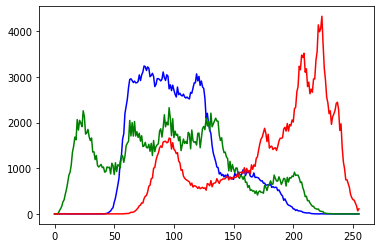

In [14]:
src = cv2.imread('lenna.bmp')

colors = ['b', 'g', 'r']

# BGR 색 평면 분할
bgr_planes = cv2.split(src)

for (p, c) in zip(bgr_planes, colors):
    # 히스토그램 계산
    hist = cv2.calcHist([p], [0], None, [256], [0, 256])
    plt.plot(hist, color=c)
    
plt.show()

In [15]:
def getGrayHistImage(hist):
    imgHist = np.full((100, 256), 255, dtype=np.uint8)
    
    histMax = np.max(hist)
    for x in range(256): 
        pt1 = (x, 100)
        pt2 = (x, 100 - int(hist[x, 0] * 100 / histMax))
        cv2.line(imgHist, pt1, pt2, 0)
    return imgHist

src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE) 

hist = cv2.calcHist([src], [0], None, [256], [0, 256]) 

histImg = getGrayHistImage(hist)

# Contrast

```cv2.normalize(src, dst, alpha=None, beta=None, norm_type=None, dtype=None,mask=None)```

In [16]:
import sys
import numpy as np
import cv2

In [17]:
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

In [18]:
alpha = 1.0

# 명암비 조절
dst = np.clip((1+alpha)*src - 128*alpha, 0, 255).astype(np.uint8)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

In [19]:
import sys
import numpy as np
import cv2

In [20]:
src = cv2.imread('Hawkes.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

In [21]:
# 자동 명암비 조절
dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)

# made_functions
#gmin= np.min(src)
#gmax= np.max(src)
#dst = ((src - gmin) * 255. / (gmax - gmin)).astype(np.uint8) #numpy사용 동일 결과

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()

cv2.destroyAllWindows()

# Historgram Equalization

```cv2.equalizeHist(src, dst=None)```

## Gray Scale 영상

In [22]:
import sys
import numpy as np
import cv2

# 그레이스케일 영상의 히스토그램 평활화
src = cv2.imread('Hawkes.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

In [23]:
# Gray Scale 그림에 대해 평활화 수행
dst = cv2.equalizeHist(src)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

## 컬러 영상

In [24]:
# 컬러 영상의 히스토그램 평활화
src = cv2.imread('field.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()



In [25]:
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
ycrcb_planes = cv2.split(src_ycrcb)

# 밝기 성분에 대해서만 히스토그램 평활화 수행
ycrcb_planes[0] = cv2.equalizeHist(ycrcb_planes[0])

dst_ycrcb = cv2.merge(ycrcb_planes)
dst = cv2.cvtColor(dst_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2.imshow('src', src)
cv2.imshow('dst', dst_ycrcb)
#cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()


# 특정 색상 영역 추출

In [26]:
import sys
import numpy as np
import cv2

In [27]:
src = cv2.imread('candies.png')
#src = cv2.imread('candies2.png')

if src is None:
    print('Image load failed!')
    sys.exit()

```cv2.inRange(src, lowerb, upperb, dst=None)```

In [28]:
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# BGR 색 공간에서 녹색영역 추출
dst1 = cv2.inRange(src, (0, 128, 0), (100, 255, 100))
# HSV 색 공간에서 녹색영역 추출
dst2 = cv2.inRange(src_hsv, (50, 150, 0), (80, 255, 255))

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()

cv2.destroyAllWindows()

with trackbar

In [29]:
import sys
import numpy as np
import cv2

In [30]:
src = cv2.imread('candies.png')

if src is None:
    print('Image load failed!')
    sys.exit()

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

In [31]:
def on_trackbar(pos):
    hmin = cv2.getTrackbarPos('H_min', 'dst')
    hmax = cv2.getTrackbarPos('H_max', 'dst')

    dst = cv2.inRange(src_hsv, (hmin, 150, 0), (hmax, 255, 255))
    cv2.imshow('dst', dst)

In [32]:
cv2.imshow('src', src)
cv2.namedWindow('dst')

cv2.createTrackbar('H_min', 'dst', 50, 179, on_trackbar)
cv2.createTrackbar('H_max', 'dst', 80, 179, on_trackbar)
on_trackbar(0)

cv2.waitKey()

cv2.destroyAllWindows()


# 실전 크로마키 합성

In [33]:
import sys
import numpy as np
import cv2

In [39]:
# 녹색 배경 동영상
cap1 = cv2.VideoCapture('woman.mp4')

if not cap1.isOpened():
    print('video open failed!')
    sys.exit()

In [40]:
# 비오는 배경 동영상
cap2 = cv2.VideoCapture('raining.mp4')

if not cap2.isOpened():
    print('video open failed!')
    sys.exit()

In [41]:
# 두 동영상의 크기, FPS는 같다고 가정
frame_cnt1 = round(cap1.get(cv2.CAP_PROP_FRAME_COUNT))
frame_cnt2 = round(cap2.get(cv2.CAP_PROP_FRAME_COUNT))
print('frame_cnt1:', frame_cnt1)
print('frame_cnt2:', frame_cnt2)

fps = cap1.get(cv2.CAP_PROP_FPS)
delay = int(1000 / fps)

frame_cnt1: 409
frame_cnt2: 353


In [42]:
# 합성 여부 플래그
do_composit = False

# 전체 동영상 재생
while True:
    ret1, frame1 = cap1.read()

    if not ret1:
        break
    
    # do_composit 플래그가 True일 때에만 합성
    if do_composit:
        ret2, frame2 = cap2.read()

        if not ret2:
            break

        # HSV 색 공간에서 녹색 영역을 검출하여 합성
        hsv = cv2.cvtColor(frame1, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, (50, 150, 0), (70, 255, 255))
        cv2.copyTo(frame2, mask, frame1)
    

    cv2.imshow('frame', frame1)
    key = cv2.waitKey(delay)

    # 스페이스바를 누르면 do_composit 플래그를 변경
    if key == ord(' '):
        do_composit = not do_composit
    elif key == 27:
        break

cap1.release()
cap2.release()
cv2.destroyAllWindows()